## ROC Plot ##

In [2]:
# Import required modules
import sys
from pathlib import Path

In [3]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from src.analysis import roc_plot
from src.utilities import load_and_preprocess_jobs
from src.config import enum_constants
from src.config.enum_constants import ROCPlotTypes

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants, src.analysis.efficiency_analysis

In [5]:
# load jobs df
loaded_df = load_and_preprocess_jobs(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Fetched and saved partition_info.json from remote URL.
[Preprocessing] Running with new database format: GPU types as dictionary.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/utilities/load_and_preprocess_jobs.py:90: UserWarning: 6545 duplicate JobIDs detected. Keeping only the latest entry for each JobID.
  processed_data = preprocess_data(jobs_df, apply_filter=False)


Found 42 records with errors. Reporting them to a summary file /Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/data/preprocessing/preprocessing_errors.log.
Processing error log file already exists. Overwriting preprocessing_errors.log
Disconnected from ../data/slurm_data.db


In [6]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)

# clip vram_constraint_efficiency to 1

# filter out CPU-only job
filtered_df = roc_instance.filter_jobs_for_analysis(
    gpu_count_filter={"min": 0, "max": float("inf"), "inclusive": False},
    elapsed_seconds_min=0)

# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)



{'jobs_with_efficiency_metrics':            JobID  ArrayJobID  ArrayID                      JobName  IsArray  \
 477090  41012953        <NA>       -1                       job.sh    False   
 477089  41012951        <NA>       -1                       job.sh    False   
 477088  41012949        <NA>       -1                       job.sh    False   
 477087  41012881        <NA>       -1                       job.sh    False   
 477086  41012877        <NA>       -1                       job.sh    False   
 ...          ...         ...      ...                          ...      ...   
 237648  23946071        <NA>       -1                       sbatch    False   
 237835  23946070        <NA>       -1                       sbatch    False   
 237834  23946069        <NA>       -1                       sbatch    False   
 182004  23890375        <NA>       -1  sys/dashboard/sys/bc_vscode    False   
 182003  23864844        <NA>       -1                         bash    False   
 
      

Filtered out 404 invalid records based on expected_value_vram_constraint_efficiency column.
Reached here


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:583: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Users) for proportion of vram_hours by threshold expected_value_vram_constraint_efficiency\n Total vram_hours: 2.3e+08 (in 60.5% of aggregated User dataset)'}, xlabel='Threshold values (expected_value_vram_constraint_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

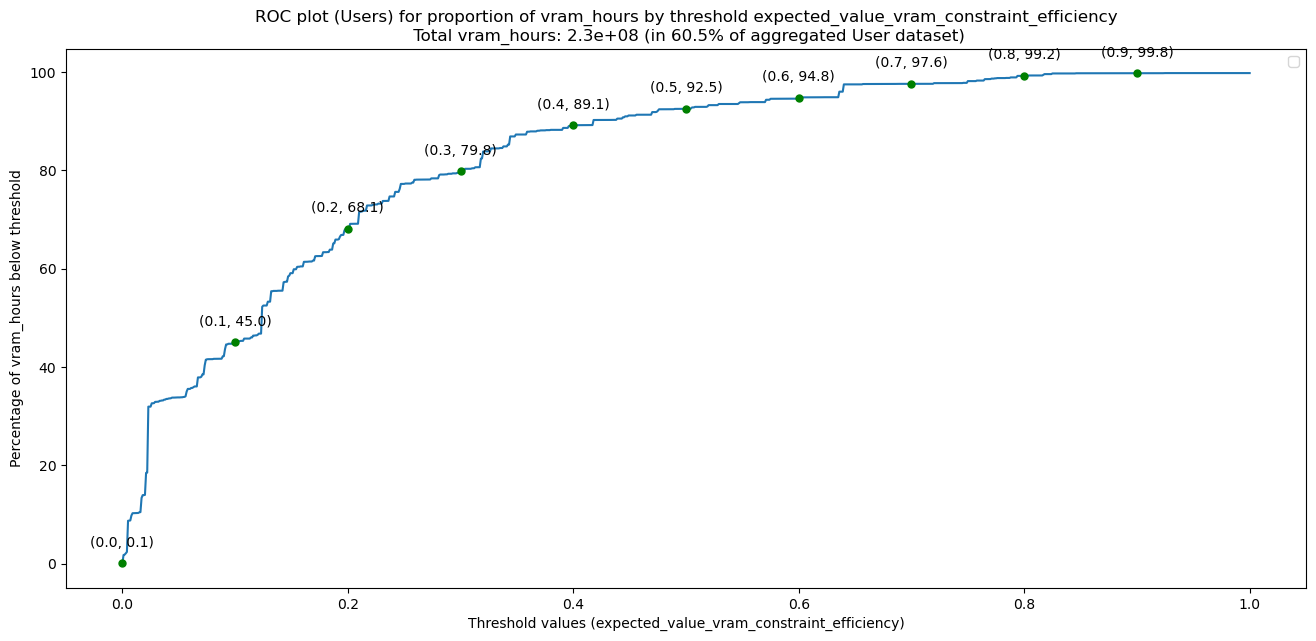

In [10]:
threshold_metric = enum_constants.UserEfficiencyMetricsEnum.EXPECTED_VALUE_VRAM_CONSTRAINTS_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS
roc_instance.plot_roc(plot_type=ROCPlotTypes.USER,
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)


### Threshold: alloc_vram_efficiency ###

Filtered out 11 invalid records based on alloc_vram_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


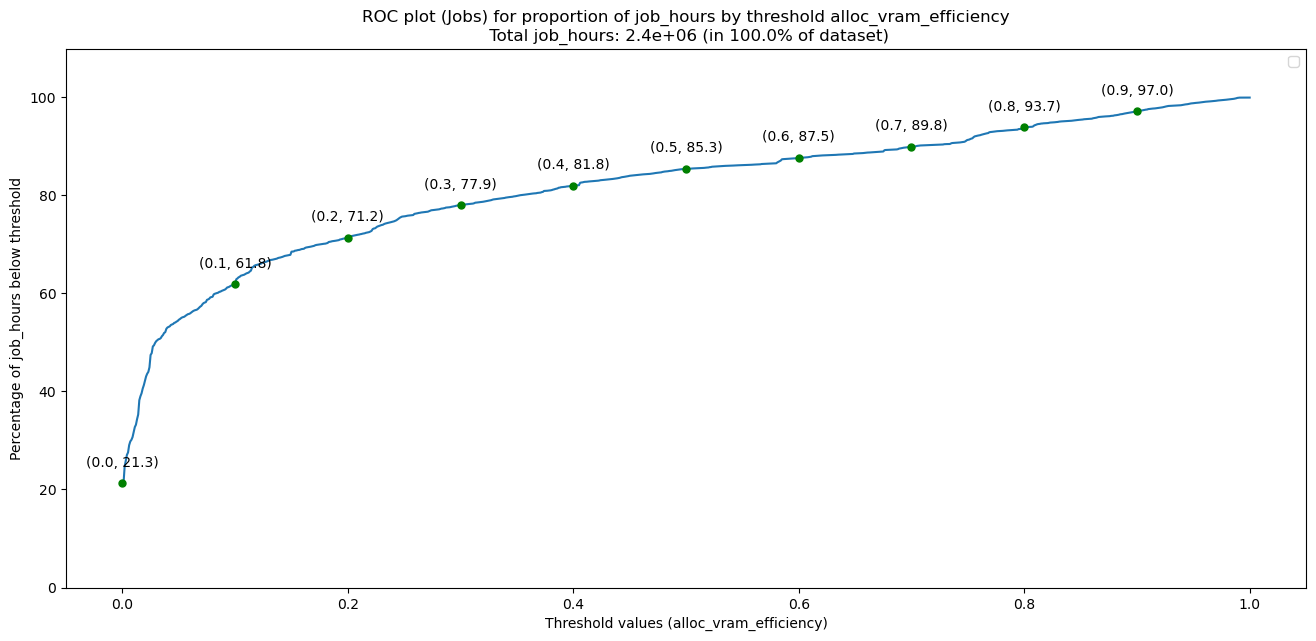

In [ ]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(plot_type=ROCPlotTypes.JOB,
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

Filtered out 11 invalid records based on alloc_vram_efficiency column.


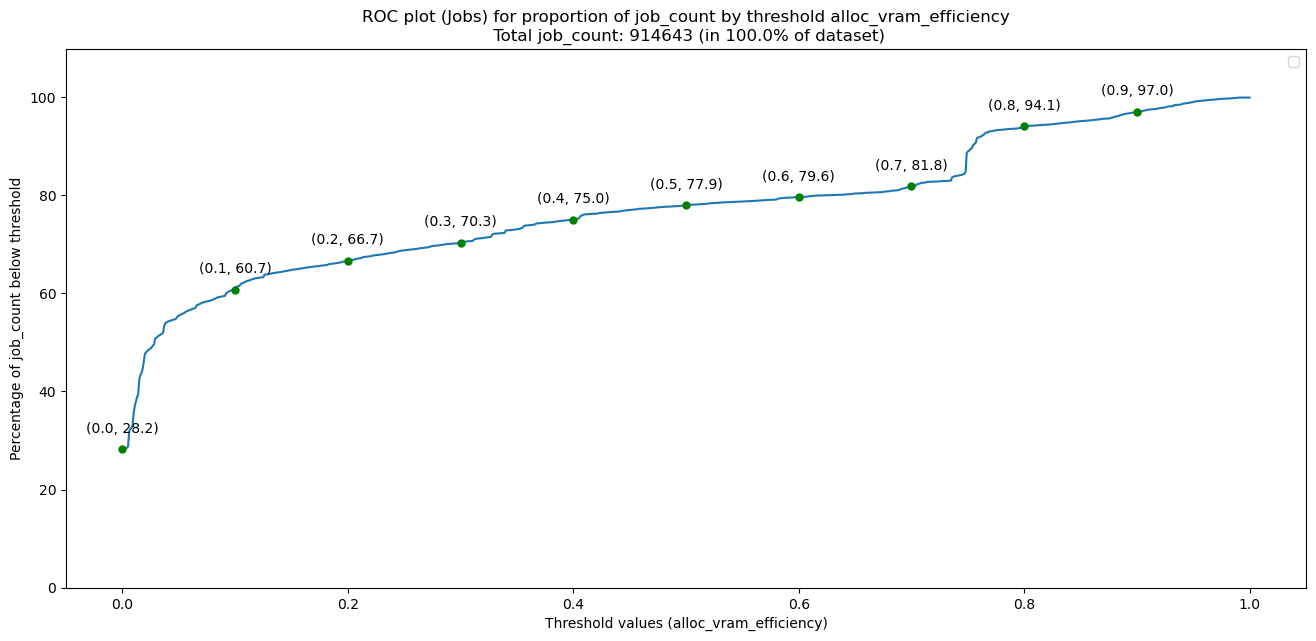

In [ ]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [ ]:
# Inspect jump jobs
temp = roc_instance.jobs_with_efficiency_metrics
filtered = temp[(temp["alloc_vram_efficiency"] >= 0.75) & (temp["alloc_vram_efficiency"] <= 0.78)]
# print(len(filtered))
# print(len(filtered["JobID"].unique()))
# print(filtered["GPUType"].value_counts())
# filtered
# filtered["User"].unique()
filtered["vram_constraint"].value_counts()


vram_constraint
11     9511
48      388
80      209
40      168
16      102
32       96
23       44
12        9
640       1
320       1
Name: count, dtype: Int64

(array([ 5203.,  9325., 11587.,  2549.,  5031.,  2867.,  1641.,  1208.,
          865.,   456.]),
 array([0.75      , 0.75299784, 0.75599569, 0.75899353, 0.76199137,
        0.76498922, 0.76798706, 0.7709849 , 0.77398275, 0.77698059,
        0.77997843]),
 <BarContainer object of 10 artists>)

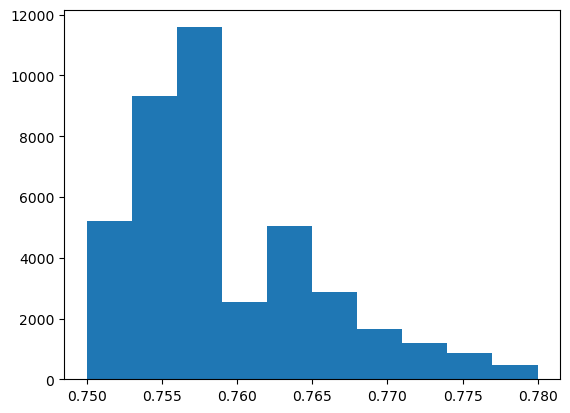

In [ ]:
import matplotlib.pyplot as plt
plt.hist(filtered["alloc_vram_efficiency"])

Filtered out 11 invalid records based on alloc_vram_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


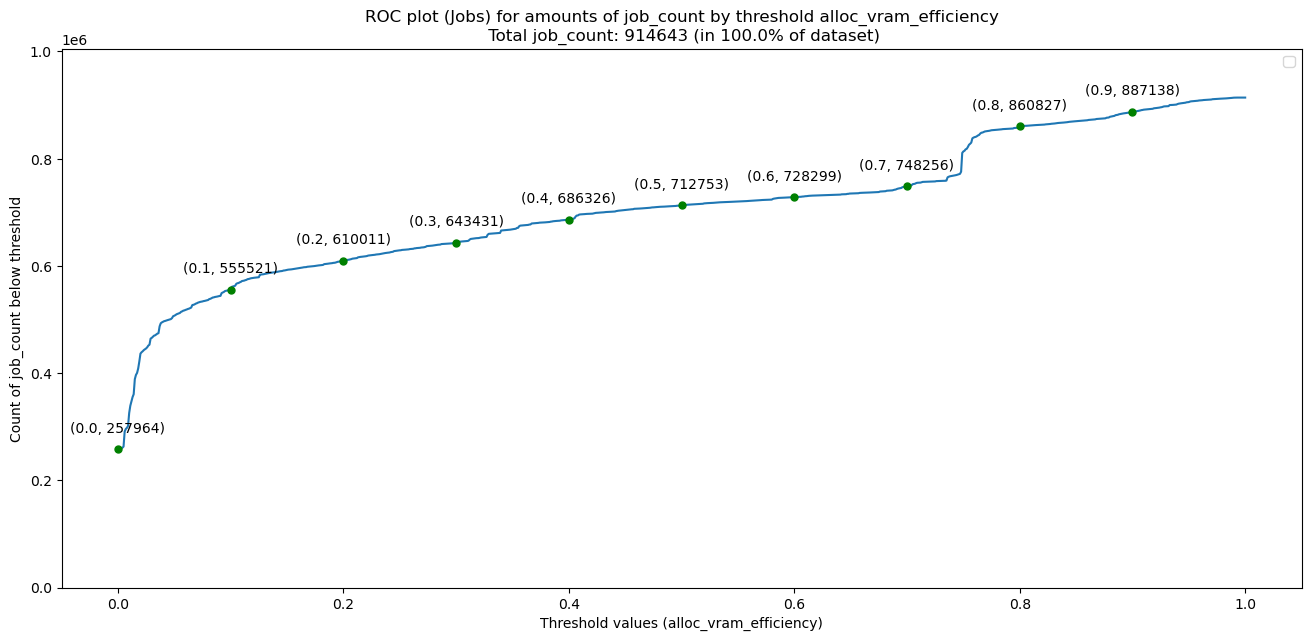

In [ ]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

Filtered out 11 invalid records based on alloc_vram_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


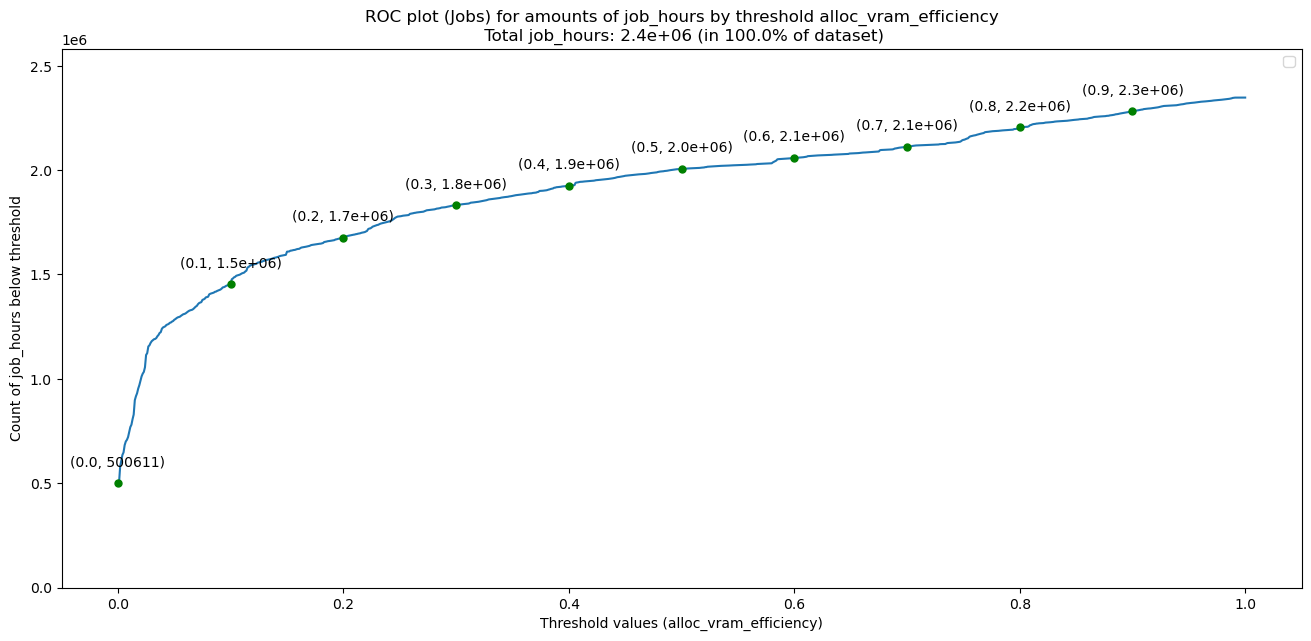

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
df = roc_instance.jobs_with_efficiency_metrics
len(df[df[threshold_metric.value].isna()])

708261

Filtered out 708261 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


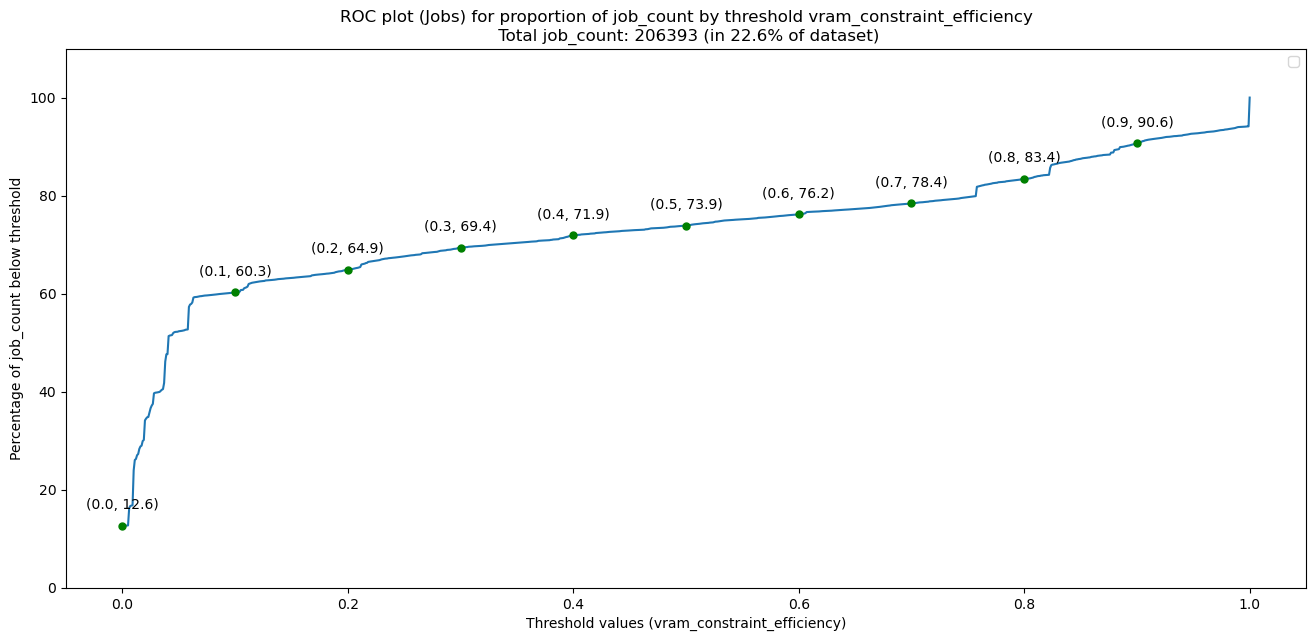

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(plot_type=ROCPlotTypes.JOB,
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric,
    clip_threshold_metric=(True, 1.0)
)

Filtered out 708261 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


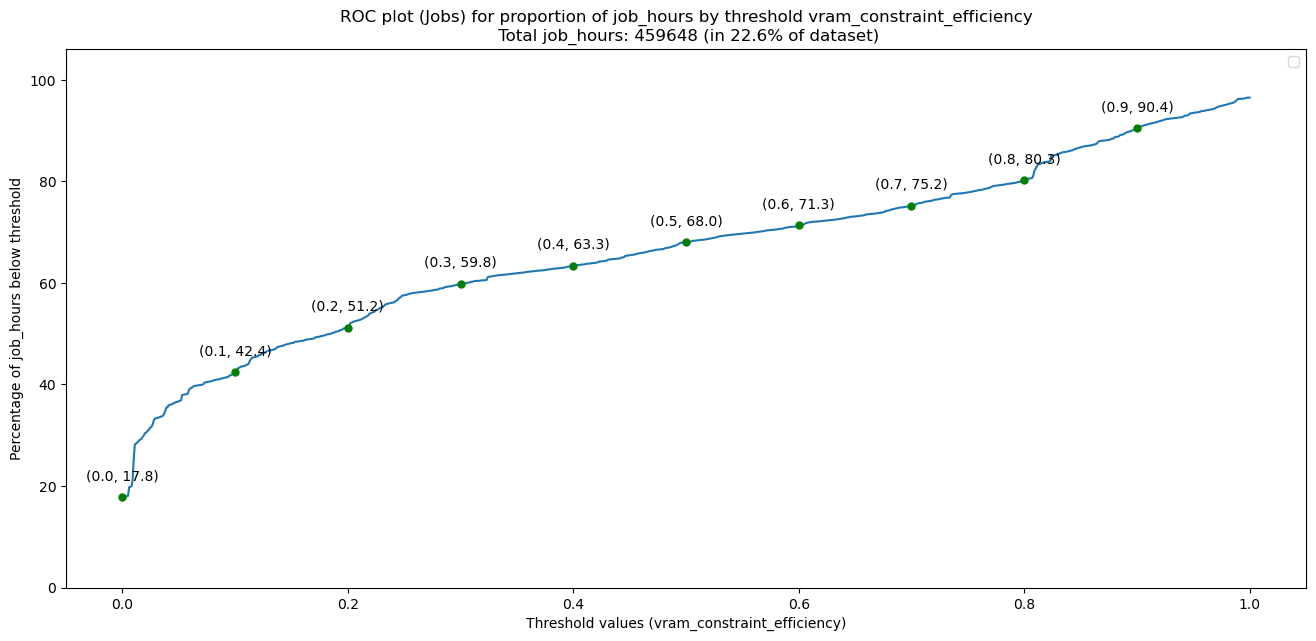

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(plot_type=ROCPlotTypes.JOB,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threshold : alloc_vram_efficiency_score ###

In [ ]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


Filtered out 257975 invalid records based on alloc_vram_efficiency_score column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


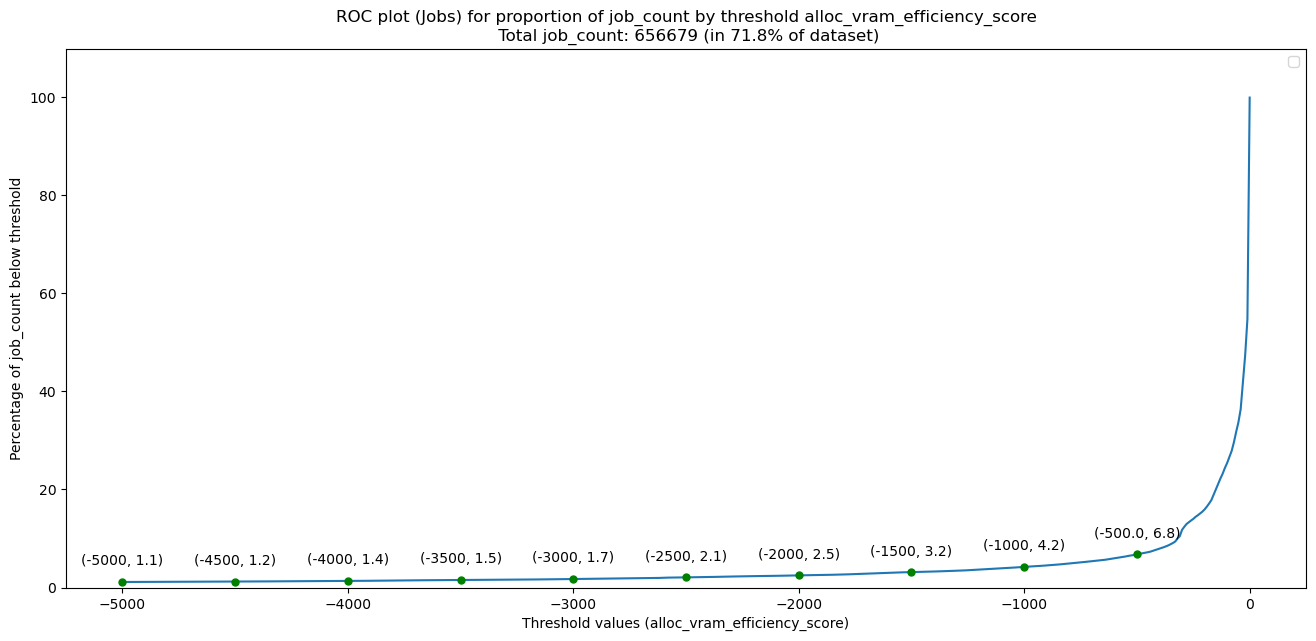

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].mean())
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].std())
roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].max()

<NA>
<NA>


<NA>

Filtered out 257975 invalid records based on alloc_vram_efficiency_score column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


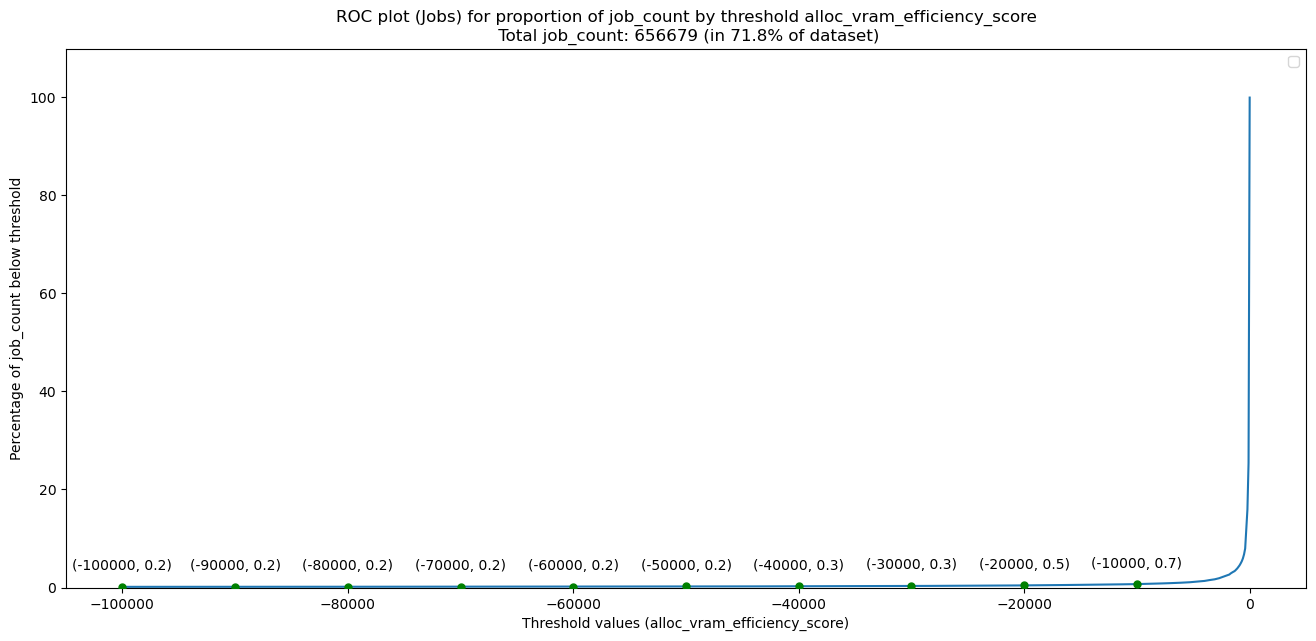

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=-100000,
    max_threshold=0.0,
    threshold_step=100,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threhold metric: Job_hour & vram_hour (For number of jobs only) ###

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].min())

2.5713325063053594
19.742469972526425
3072.2844444444445
0.001388888888888889


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


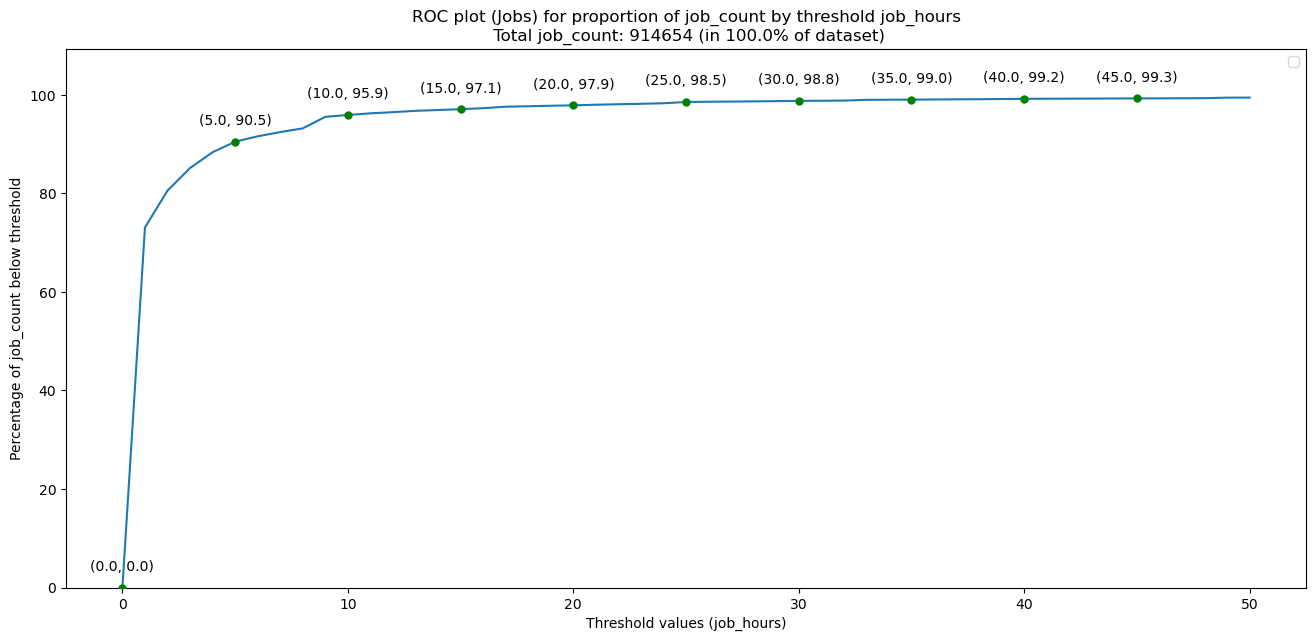

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.JOB_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=50,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [ ]:
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].min())

258.08316652526526
6106.722058306189
2162888.248888889
0.0


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


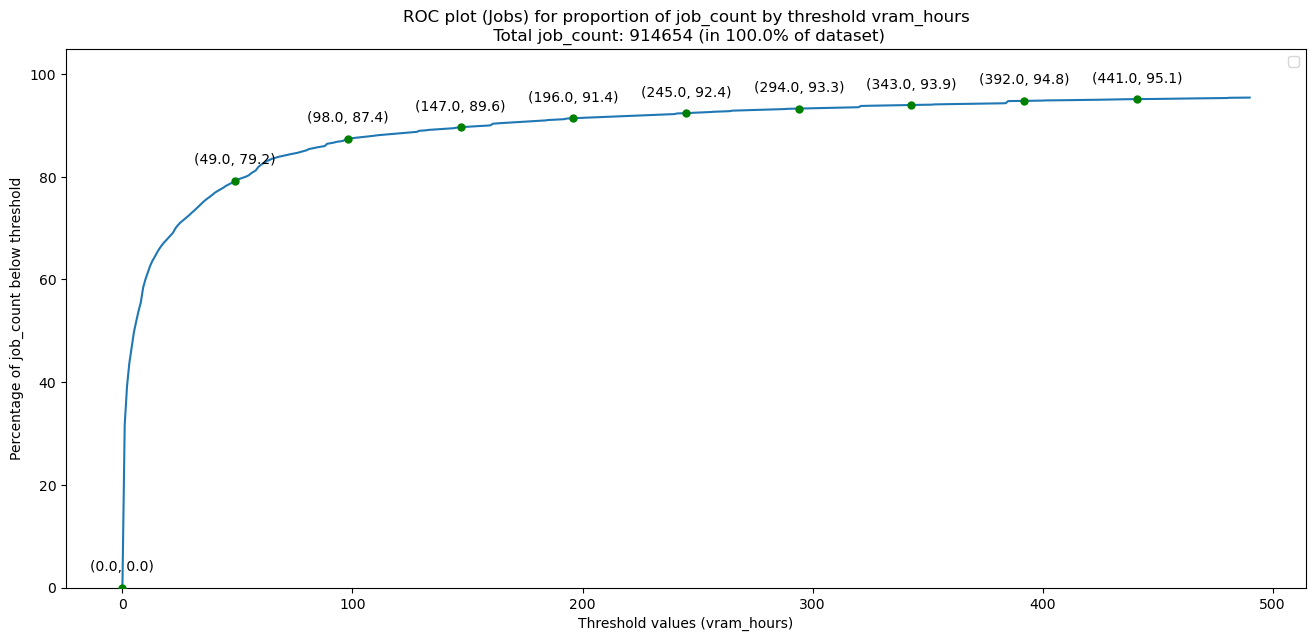

In [ ]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=490,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion metric : User ###

In [ ]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

         used_vram_gib  allocated_vram  alloc_vram_efficiency    Partition  \
579207             0.0               0                    NaN          gpu   
1633331            0.0               0                    NaN          gpu   
1633335            0.0               0                    NaN          gpu   
1638518            0.0               0                    NaN          gpu   
1654812            0.0               0                    NaN          gpu   
1654834            0.0               0                    NaN          gpu   
1655346            0.0               0                    NaN          gpu   
1660137            0.0               0                    NaN          gpu   
1726868            0.0               0                    NaN  gpu-preempt   
3700497            0.0               0                    NaN     cbio-gpu   
3700525            0.0               0                    NaN     cbio-gpu   

        GPUType  
579207    [cpu]  
1633331   [cpu]  
1633335  

In [ ]:
mask = roc_instance.jobs_with_efficiency_metrics["vram_constraint_efficiency"].isna()
temp = roc_instance.jobs_with_efficiency_metrics[mask].copy()
len(temp)

708261

Filtered out 708261 invalid records based on vram_constraint_efficiency column.


<string>:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


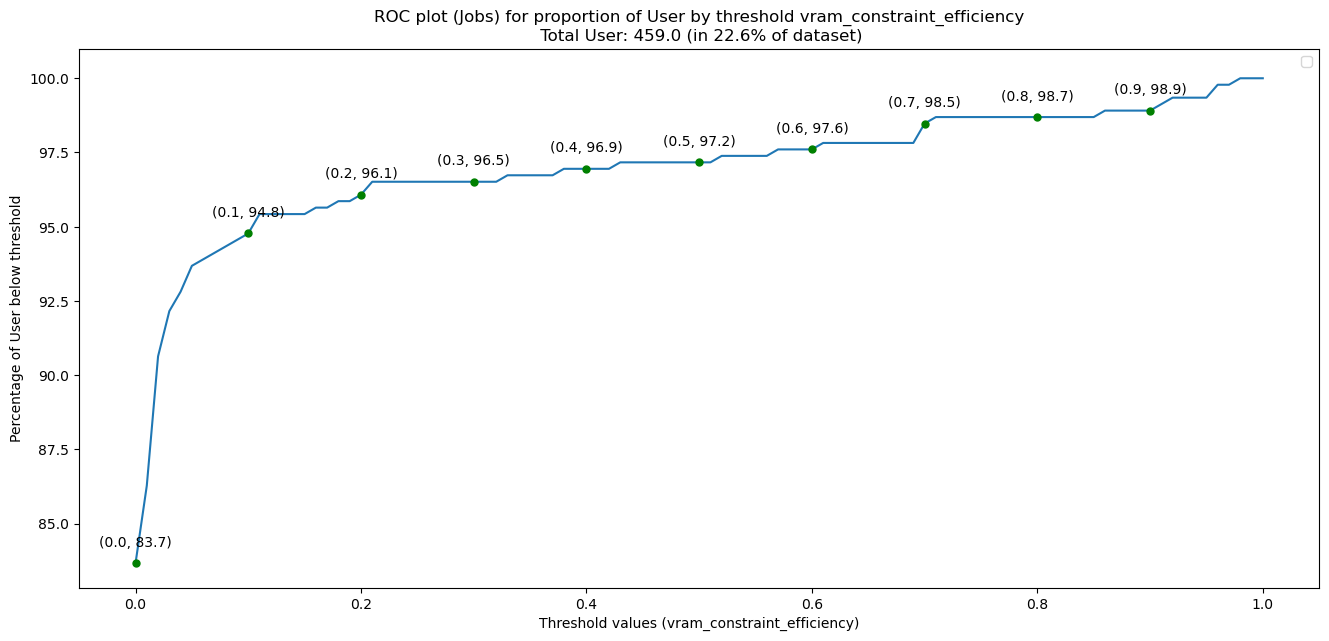

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [ ]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

np.int64(135)

Filtered out 3767 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


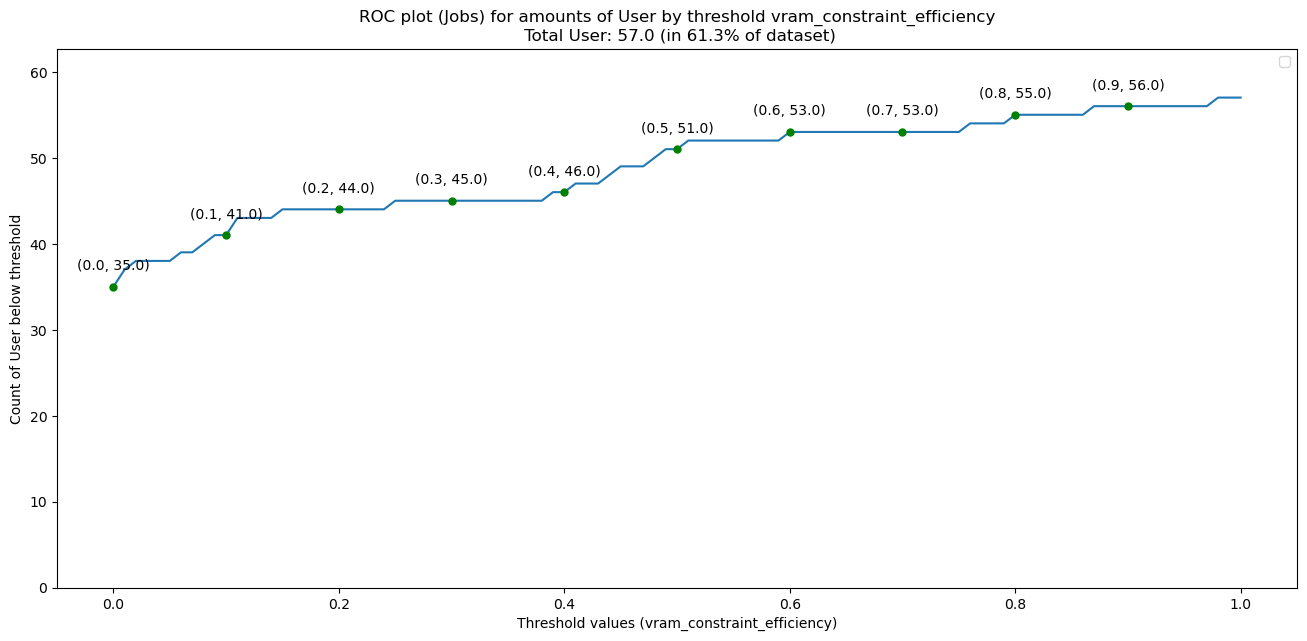

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


Filtered out 575 invalid records based on alloc_vram_efficiency_score column.


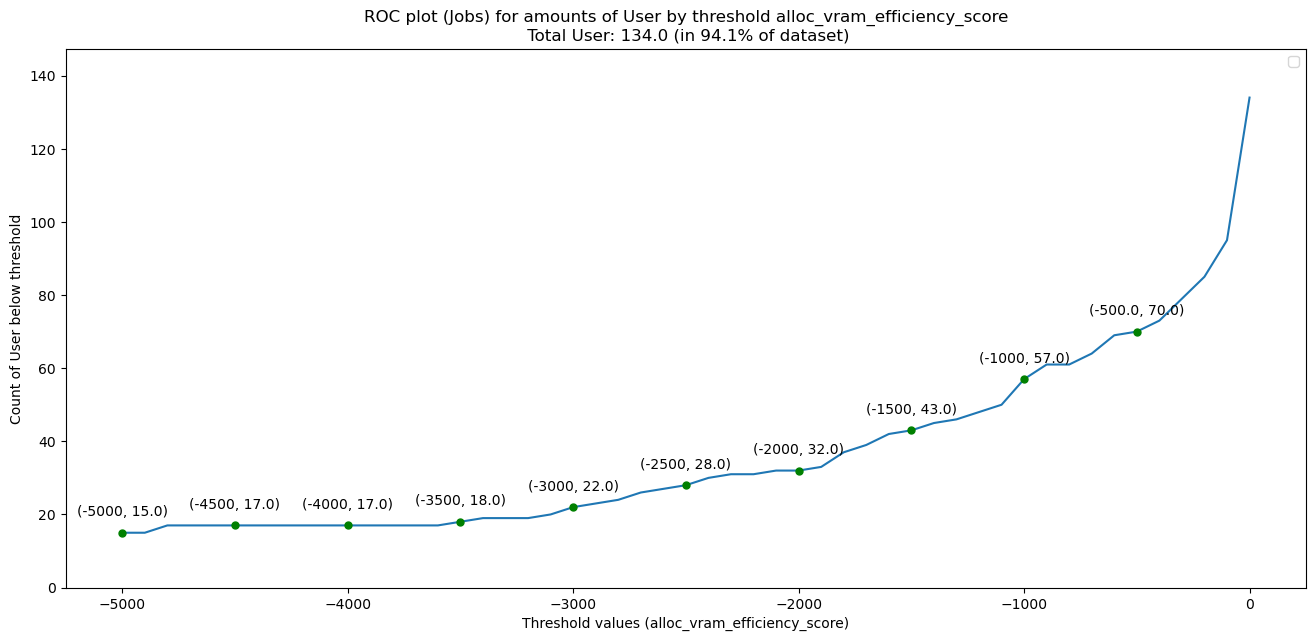

In [ ]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc(plot_type=ROCPlotTypes.JOB,
    max_threshold=0.0,
    threshold_step=100,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: PI_GROUP ###

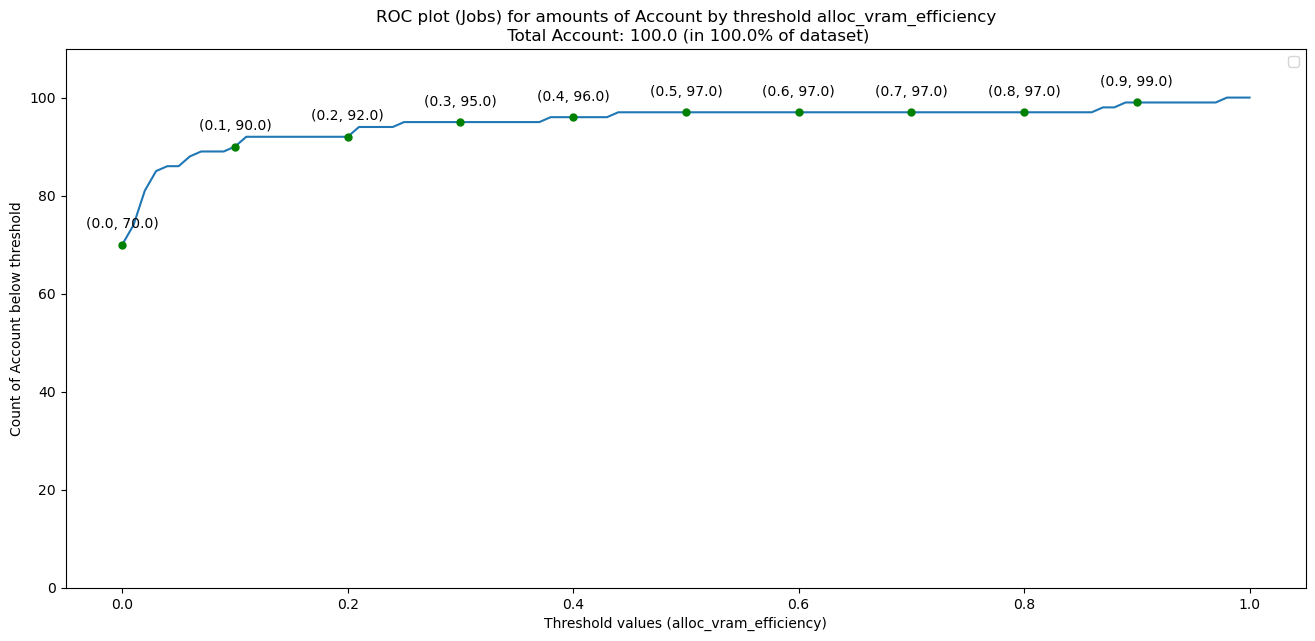

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

In [ ]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

np.int64(61)

Filtered out 3767 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


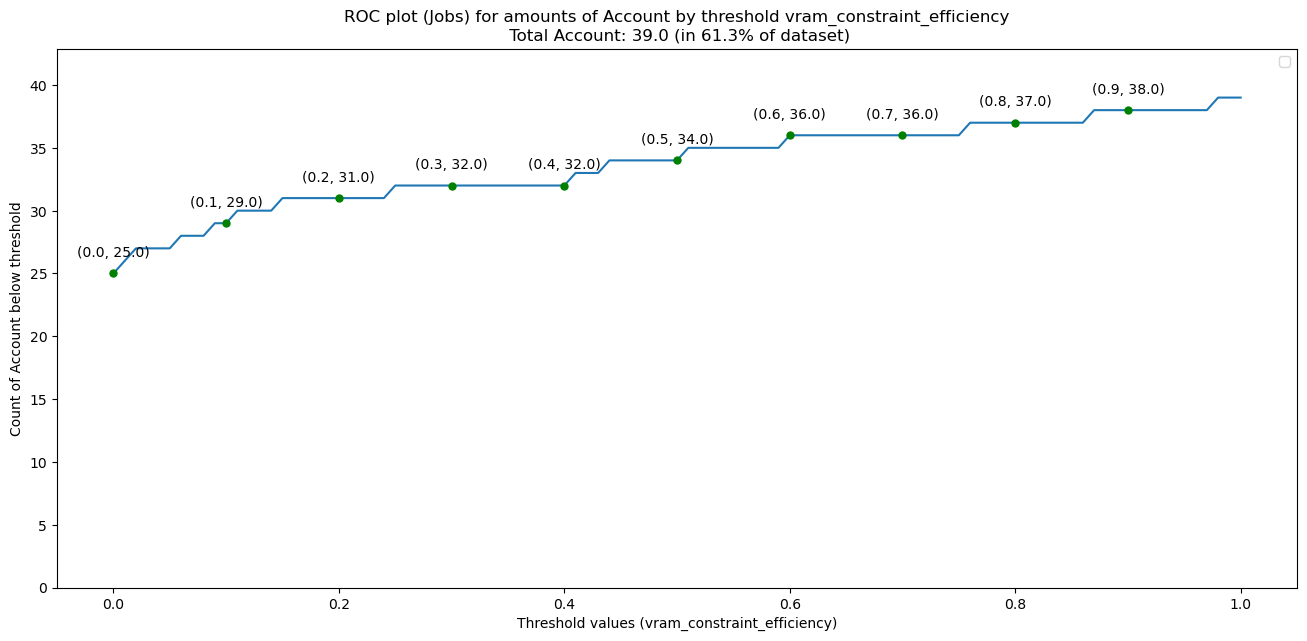

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


Filtered out 575 invalid records based on alloc_vram_efficiency_score column.


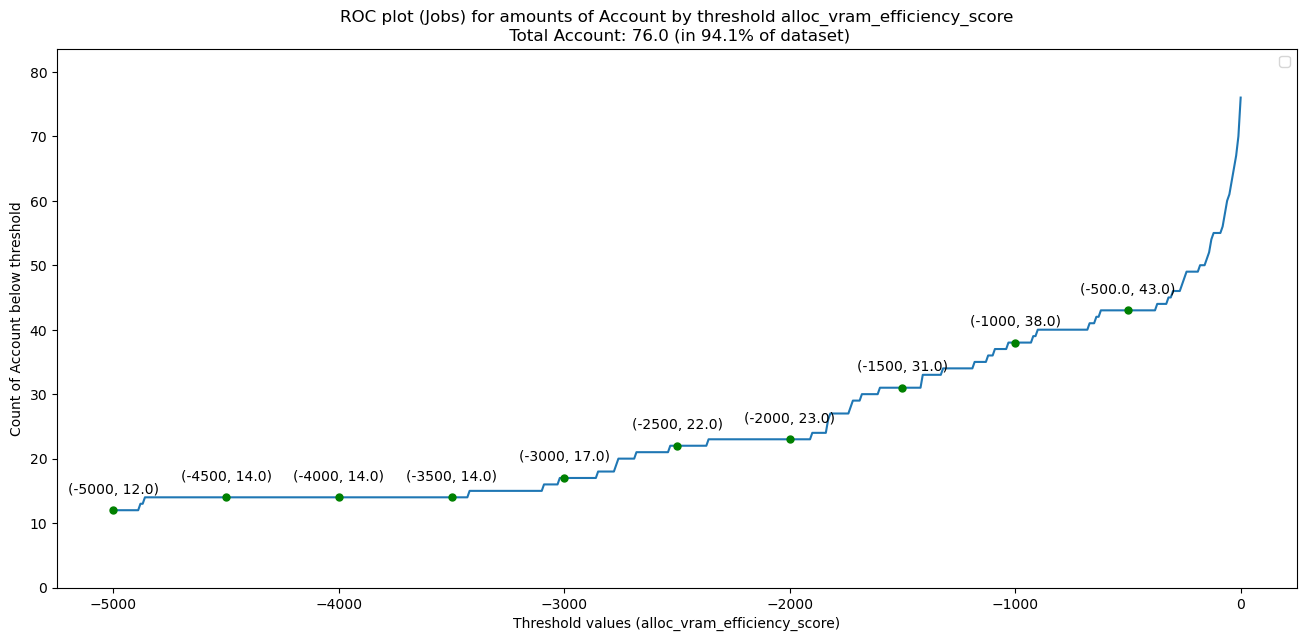

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: VRAM_HOURS ###

Filtered out 3767 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold vram_constraint_efficiency\n Total vram_hours: 792623 (in 61.3% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

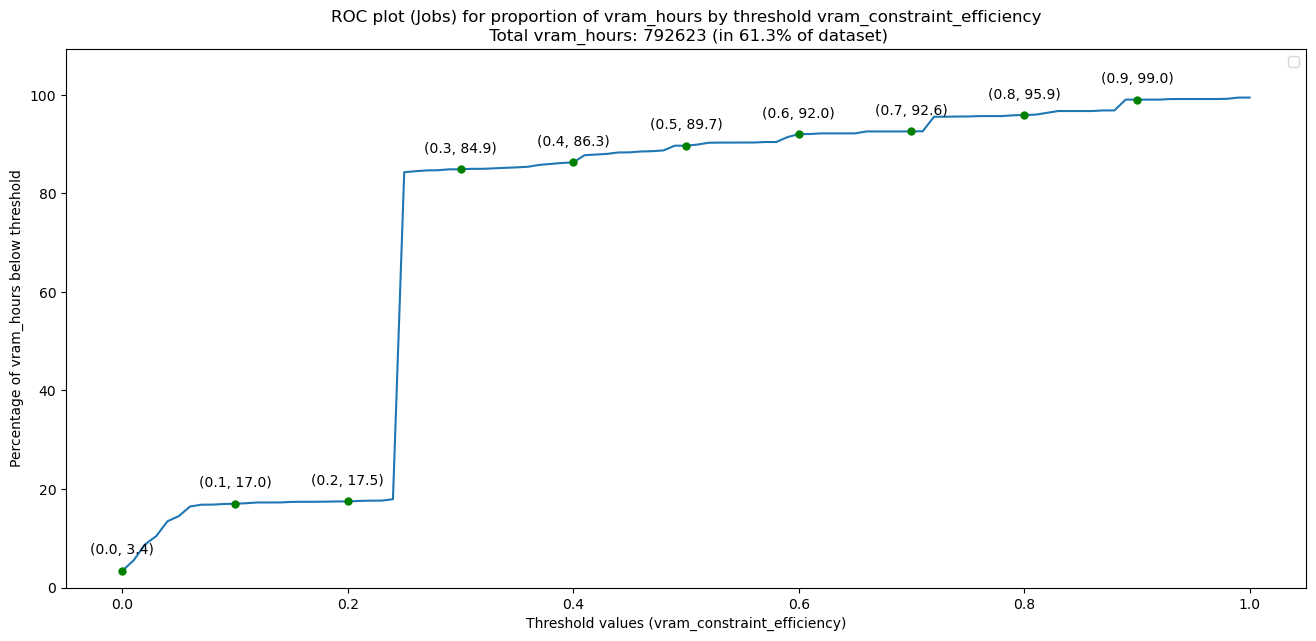

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 1.7e+06 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

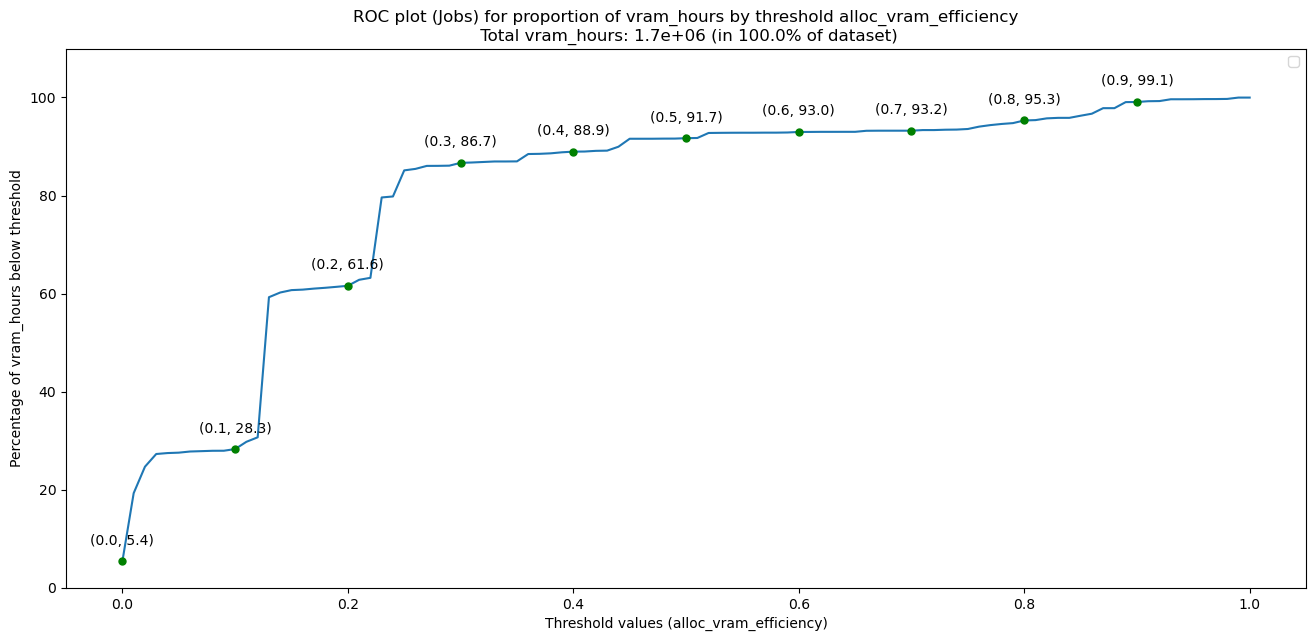

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

Filtered out 575 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -925815.4587049824 based on data.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:547: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency_score\n Total vram_hours: 1.6e+06 (in 94.1% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Percentage of vram_hours below threshold'>])

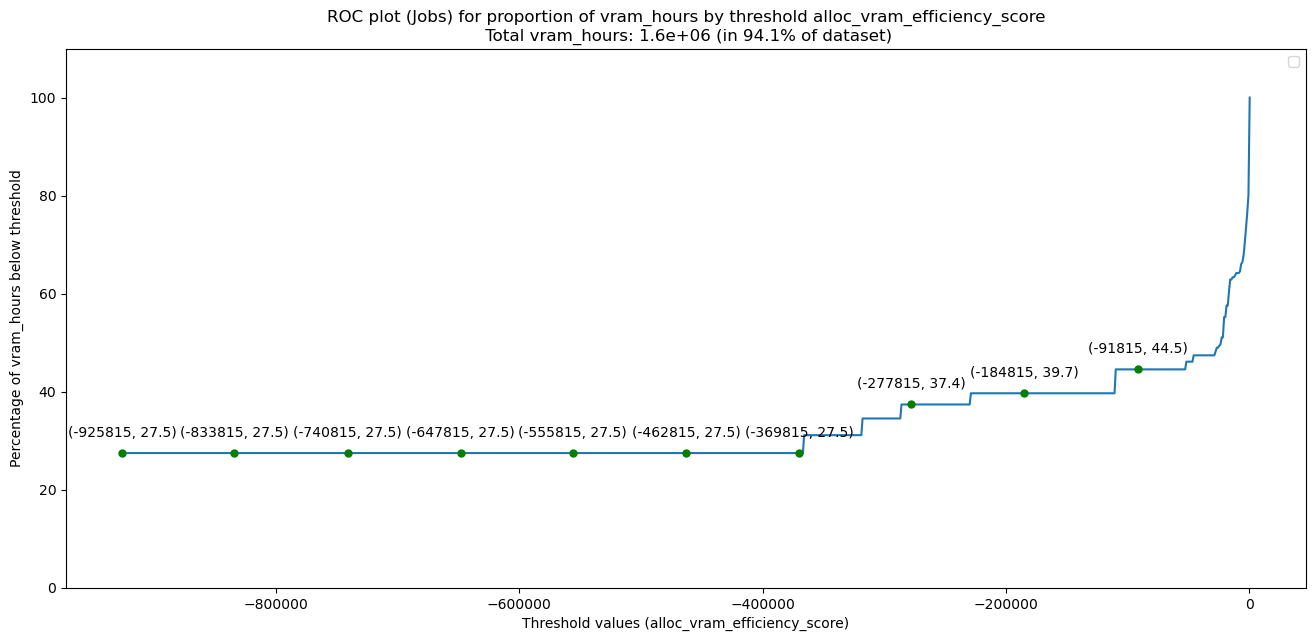

In [ ]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    plot_type=ROCPlotTypes.JOB,
    max_threshold=0.0,
    # min_threshold=-200000.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [ ]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

                      User  job_count  user_job_hours
82          jroh_umass_edu        195      100.400833
177   yekyungkim_umass_edu        253     1063.280278
14   allen_yang001_umb_edu        432      813.741944
54     emccleary_umass_edu        891     1297.170833
79     joohwanko_umass_edu       1886     1848.049167
126       pchien_umass_edu       4451     1527.904167


Filtered out 11 invalid records based on alloc_vram_efficiency column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for proportion of job_count by threshold alloc_vram_efficiency\n Total job_count: 914643 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of job_count below threshold'>])

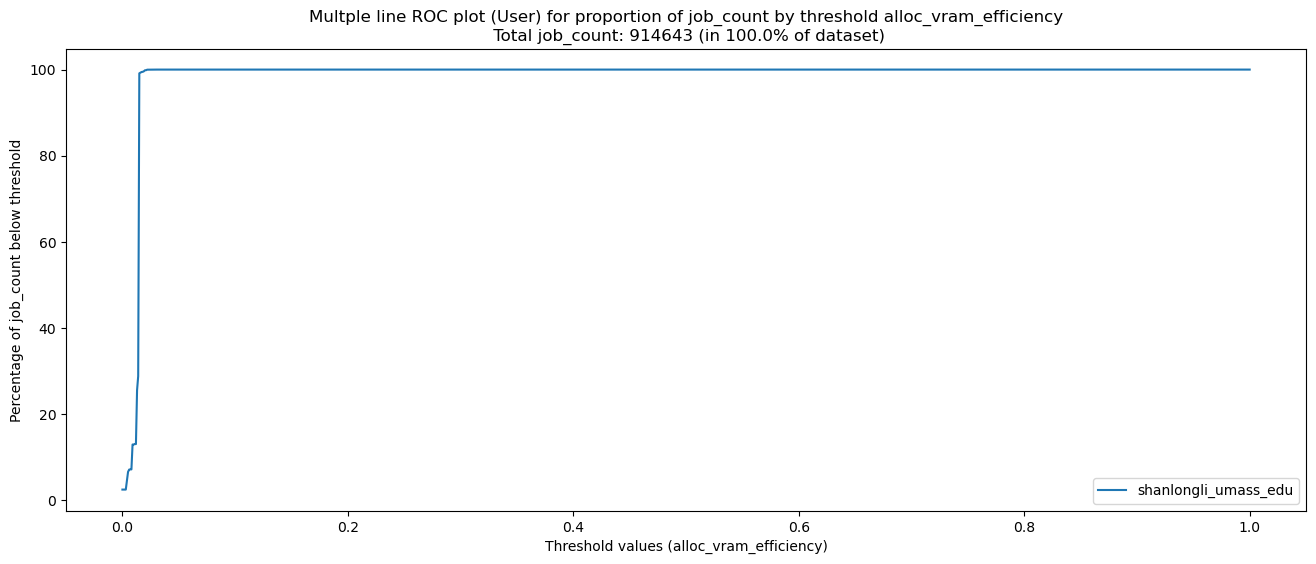

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum
import numpy as np
roc_instance.multiple_line_roc_plot(
    plot_object_list=["shanlongli_umass_edu"],
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=True,
)

Filtered out 575 invalid records based on alloc_vram_efficiency_score column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_count by threshold alloc_vram_efficiency_score\n Total job_count: 9150 (in 94.1% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of job_count below threshold'>])

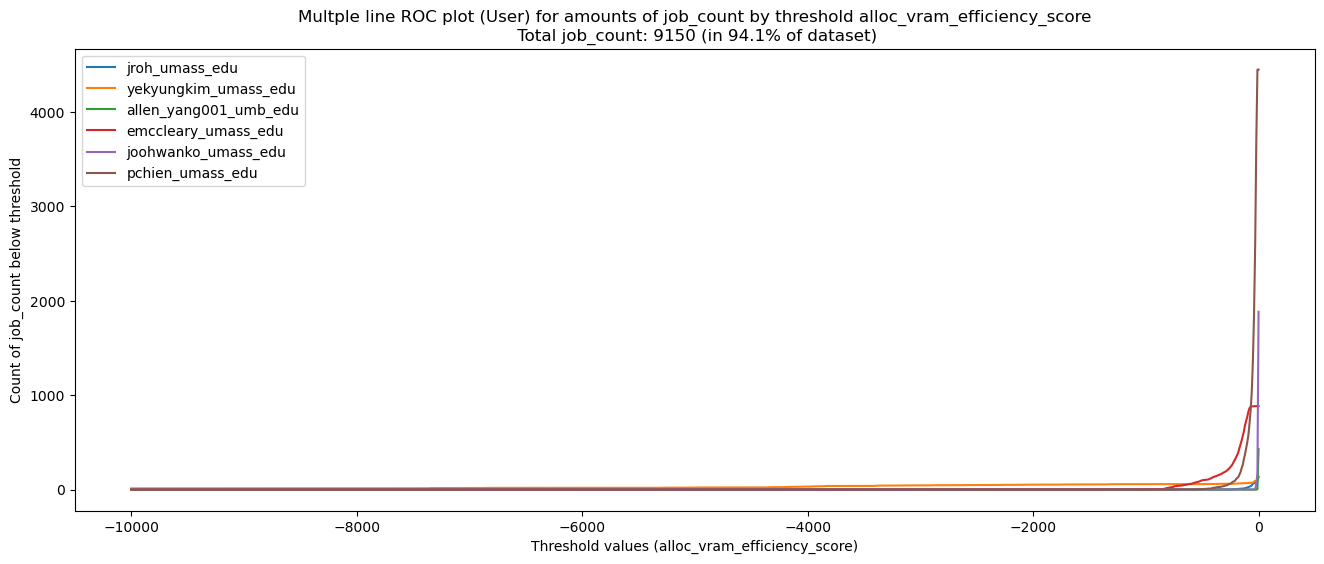

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

Filtered out 3767 invalid records based on vram_constraint_efficiency column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_count by threshold vram_constraint_efficiency\n Total job_count: 5958 (in 61.3% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_count below threshold'>])

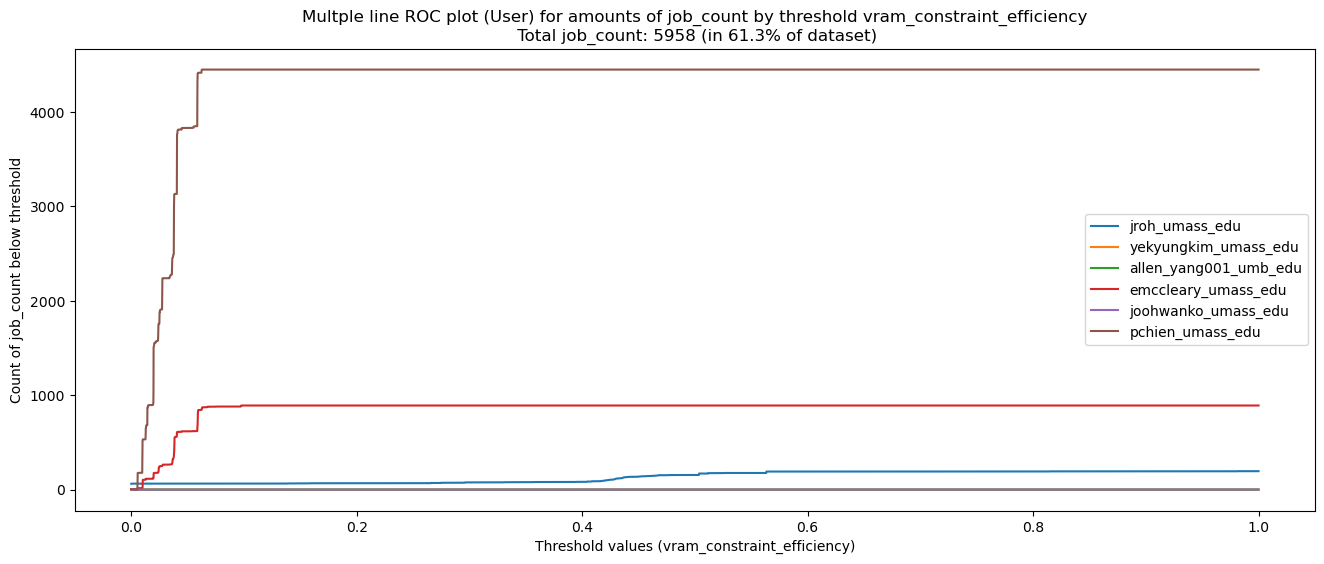

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [ ]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

Empty DataFrame
Columns: [User, job_count, job_hours, vram_efficiency_score, allocated_vram, used_vram]
Index: []


#### Inspect the 6 users with highest number of job_hours ####

In [ ]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

                          User  job_count    job_hours
177       yekyungkim_umass_edu        253  1063.280278
54         emccleary_umass_edu        891  1297.170833
10       achyut_subedi_uri_edu          8      1325.71
126           pchien_umass_edu       4451  1527.904167
71   jacob_adamczyk001_umb_edu         25  1680.179167
79         joohwanko_umass_edu       1886  1848.049167


Filtered out 3767 invalid records based on vram_constraint_efficiency column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold vram_constraint_efficiency\n Total job_hours: 6072 (in 61.3% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_hours below threshold'>])

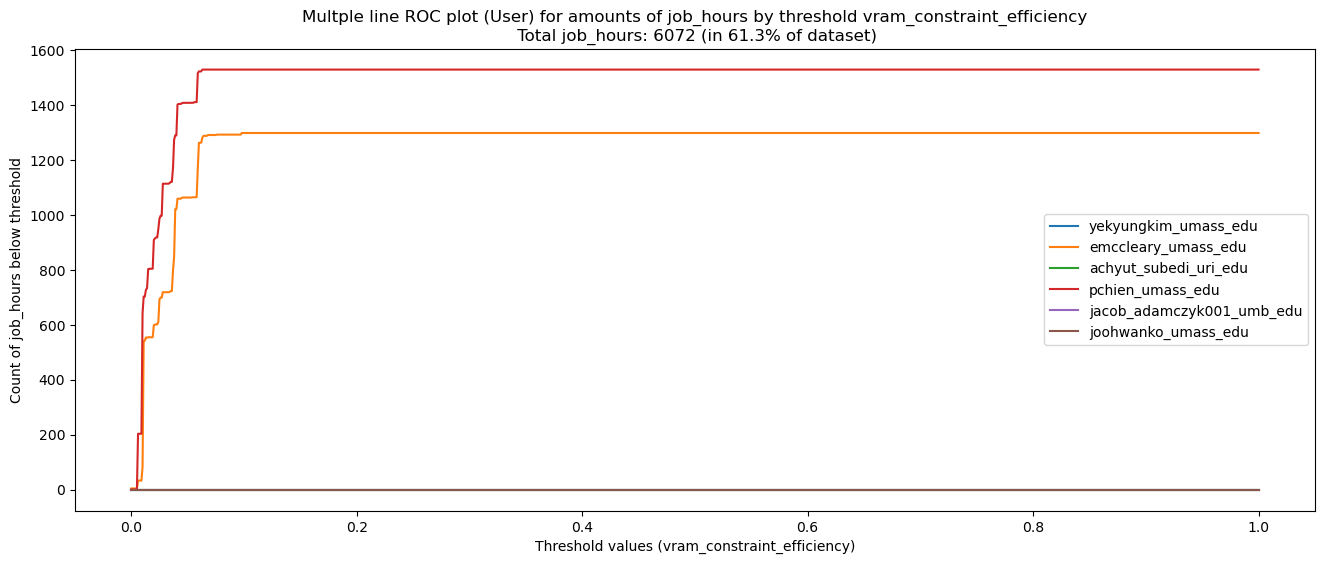

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold alloc_vram_efficiency\n Total job_hours: 18898 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_hours below threshold'>])

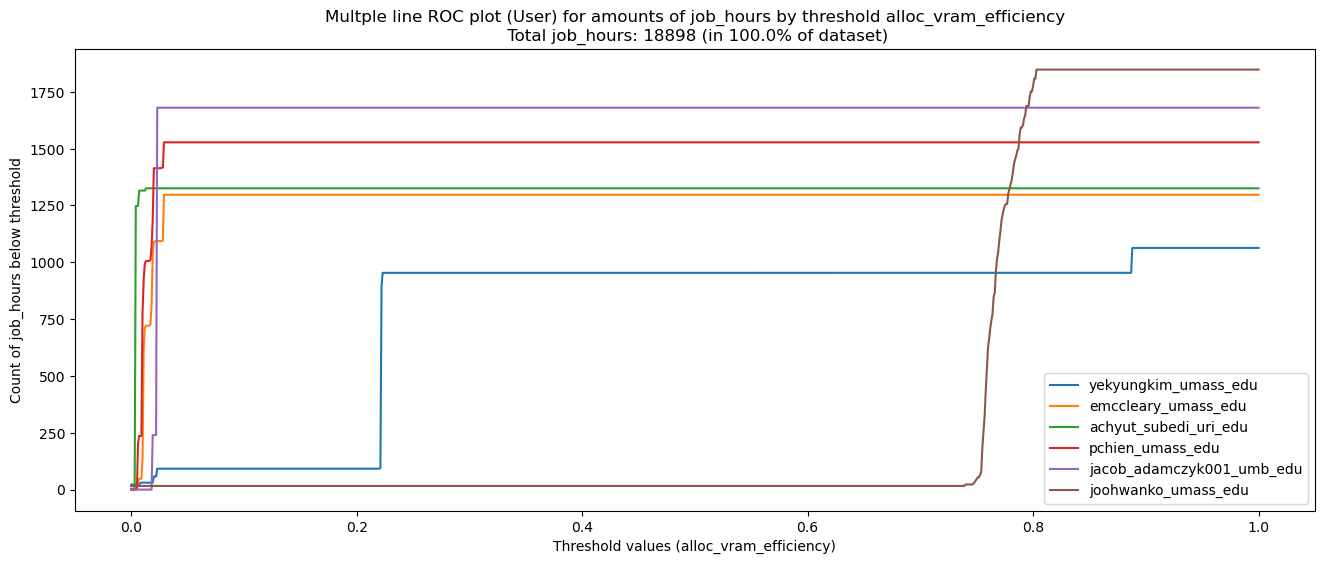

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [ ]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [ ]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUPS.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

/var/folders/fk/pzwkjjt962zdq9cqb2t9lz7m0000gn/T/ipykernel_81977/617810342.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur_df.groupby(ProportionMetricsEnum.PI_GROUPS.value)


,Account,job_count,job_hours
50,pi_ahoumansadr_umass_edu,230,361.778611
45,pi_miyyer_umass_edu,348,1564.7825
14,pi_bo_sheng_umb_edu,432,813.741944
31,pi_bioch642_umass_edu,891,1297.170833
19,pi_jdomke_umass_edu,1886,1848.049167
40,pi_pchien_umass_edu,4451,1527.904167


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of job_count by threshold alloc_vram_efficiency\n Total job_count: 9725 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_count below threshold'>])

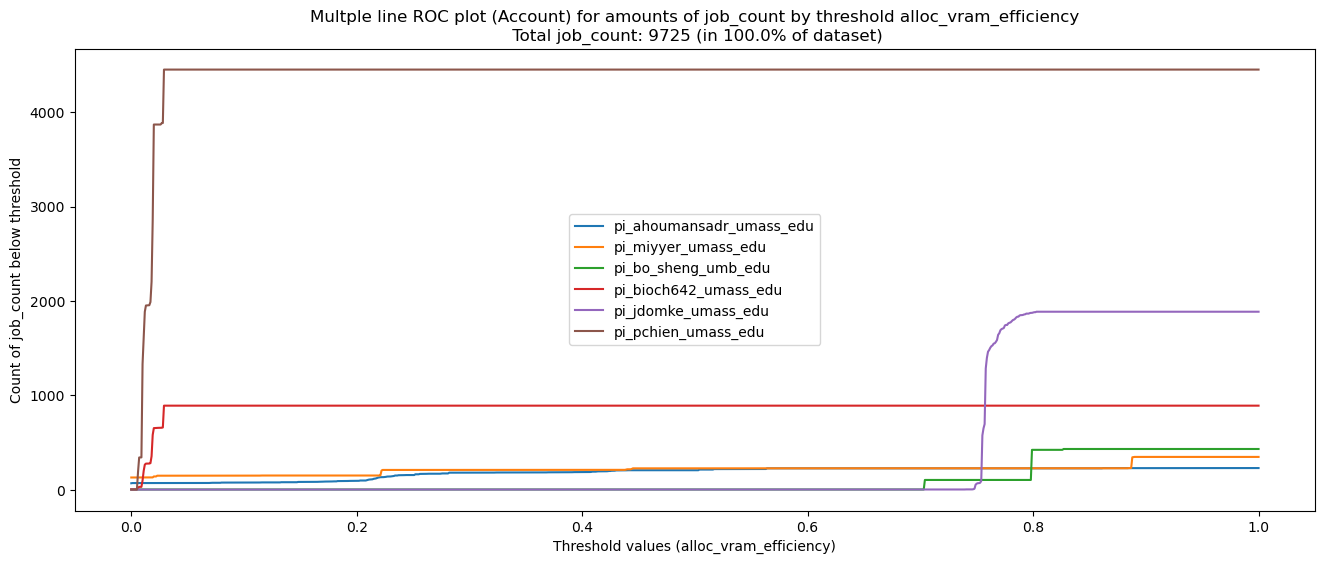

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Filtered out 575 invalid records based on alloc_vram_efficiency_score column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of job_count by threshold alloc_vram_efficiency_score\n Total job_count: 9150 (in 94.1% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of job_count below threshold'>])

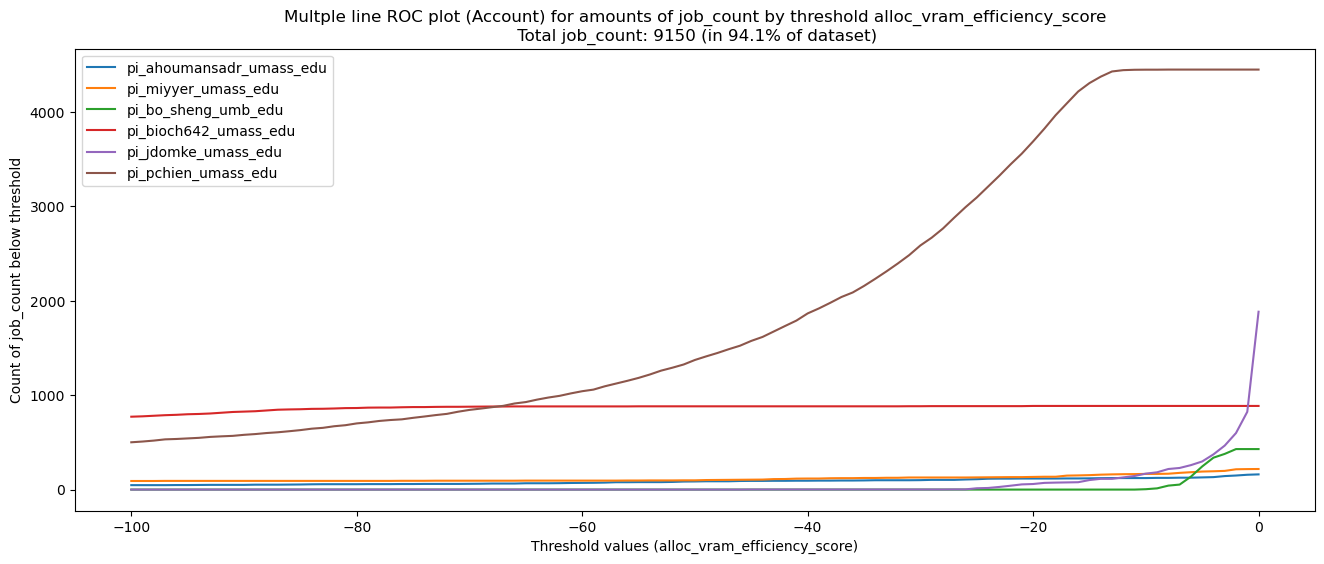

In [ ]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)